In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('NFLX.csv', date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,226.708094,229.972979,223.105690,226.670159,226.670159,9.730586e+06
std,103.305422,104.851349,101.458611,103.203785,103.203785,6.398967e+06
min,80.570000,84.699997,79.949997,82.790001,82.790001,1.616300e+06
25%,125.779999,127.165001,124.355000,125.514999,125.514999,5.573200e+06
50%,197.850006,199.440002,195.330002,198.000000,198.000000,7.857600e+06
75%,325.529999,330.835006,318.869995,325.220001,325.220001,1.178630e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,5.841040e+07


In [7]:
data.count()

Date         1007
Open         1007
High         1007
Low          1007
Close        1007
Adj Close    1007
Volume       1007
dtype: int64

<ipython-input-8-0d687a090726>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data.rolling(window=30).mean()['Close'].plot()


<Axes: >

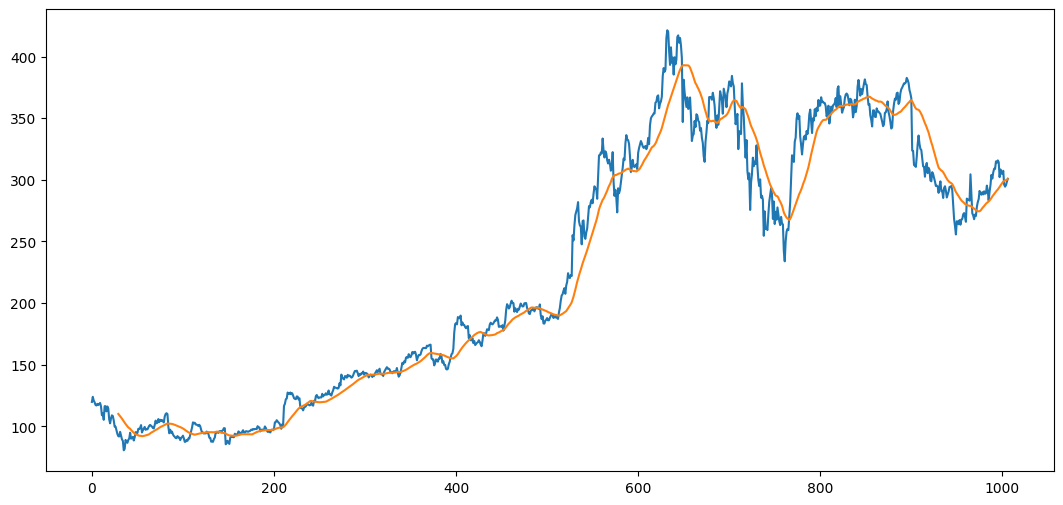

In [8]:
data['Open'].plot(figsize=(13,6))
data.rolling(window=30).mean()['Close'].plot()

<Axes: >

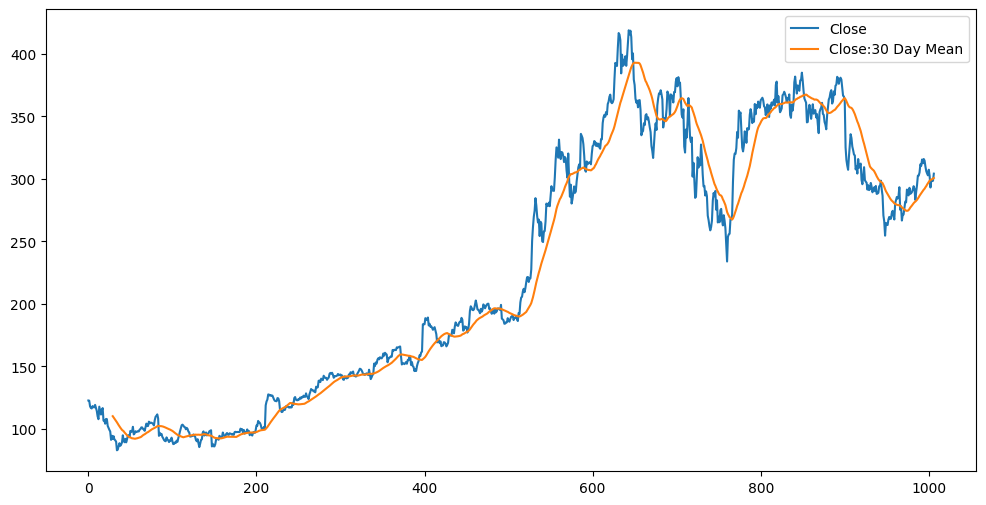

In [9]:
data['Close:30 Day Mean']=data['Close'].rolling(window=30).mean()
data[['Close','Close:30 Day Mean']].plot(figsize=(12,6))

<Axes: >

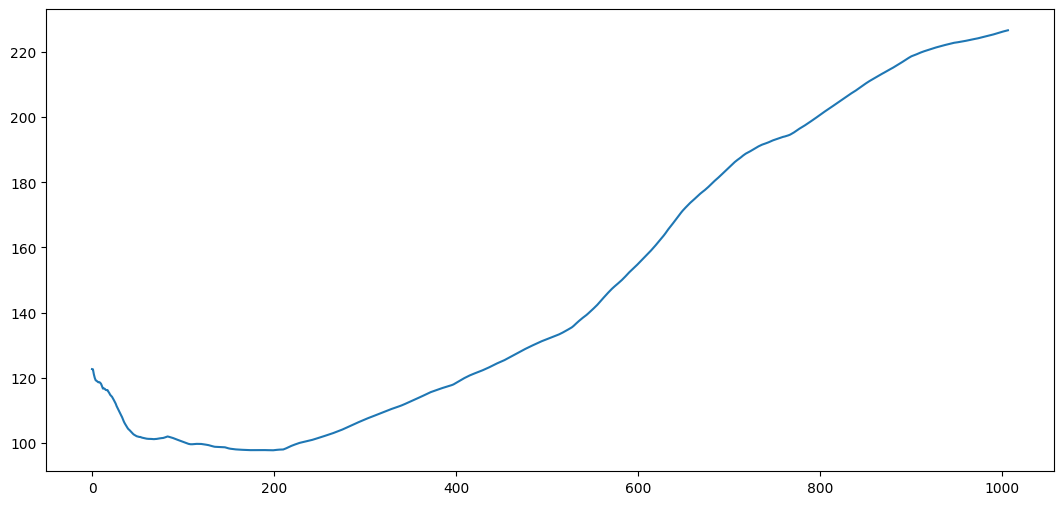

In [10]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(13,6))

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [12]:
print(scaled_data)

[[0.11853768]
 [0.11815099]
 [0.10479504]
 ...
 [0.64147183]
 [0.6416503 ]
 [0.65863523]]


In [13]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [14]:
training_data_len

805

In [15]:
train_data

array([[0.11853768],
       [0.11815099],
       [0.10479504],
       [0.10066035],
       [0.09950026],
       [0.1052115 ],
       [0.10274258],
       [0.10208817],
       [0.10806711],
       [0.10089832],
       [0.09396751],
       [0.08081979],
       [0.07397823],
       [0.10378368],
       [0.09450294],
       [0.08507347],
       [0.09572253],
       [0.10051163],
       [0.07070616],
       [0.07219346],
       [0.06321019],
       [0.07466238],
       [0.07421618],
       [0.05818311],
       [0.05333452],
       [0.04857517],
       [0.04473794],
       [0.02486763],
       [0.03456483],
       [0.02692009],
       [0.03361293],
       [0.02587898],
       [0.02364804],
       [0.0205842 ],
       [0.        ],
       [0.00157653],
       [0.00993514],
       [0.01683621],
       [0.01058956],
       [0.01371289],
       [0.01862098],
       [0.03560593],
       [0.02290439],
       [0.01915641],
       [0.02718781],
       [0.0188292 ],
       [0.02623595],
       [0.034

In [16]:
test_data

array([[0.81661612],
       [0.79793565],
       [0.80763278],
       [0.82342788],
       [0.80257602],
       [0.79365222],
       [0.82119693],
       [0.81349274],
       [0.82818725],
       [0.82107801],
       [0.8289309 ],
       [0.83482063],
       [0.820959  ],
       [0.86986138],
       [0.87774405],
       [0.82759239],
       [0.84311979],
       [0.82449878],
       [0.80486642],
       [0.80855489],
       [0.8143554 ],
       [0.84529118],
       [0.84755191],
       [0.85359034],
       [0.84802785],
       [0.84091852],
       [0.82878221],
       [0.83859834],
       [0.83624847],
       [0.84734366],
       [0.79823313],
       [0.79148074],
       [0.82298171],
       [0.80894161],
       [0.82562914],
       [0.87616751],
       [0.88970199],
       [0.86691656],
       [0.84936637],
       [0.8687608 ],
       [0.85977746],
       [0.85594029],
       [0.88054018],
       [0.88128383],
       [0.89904217],
       [0.88012378],
       [0.85570227],
       [0.837

In [17]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

744/744 - 40s - loss: 0.0068 - 40s/epoch - 53ms/step


In [22]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 3s 58ms/step


<ipython-input-23-77fd105f28ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = None


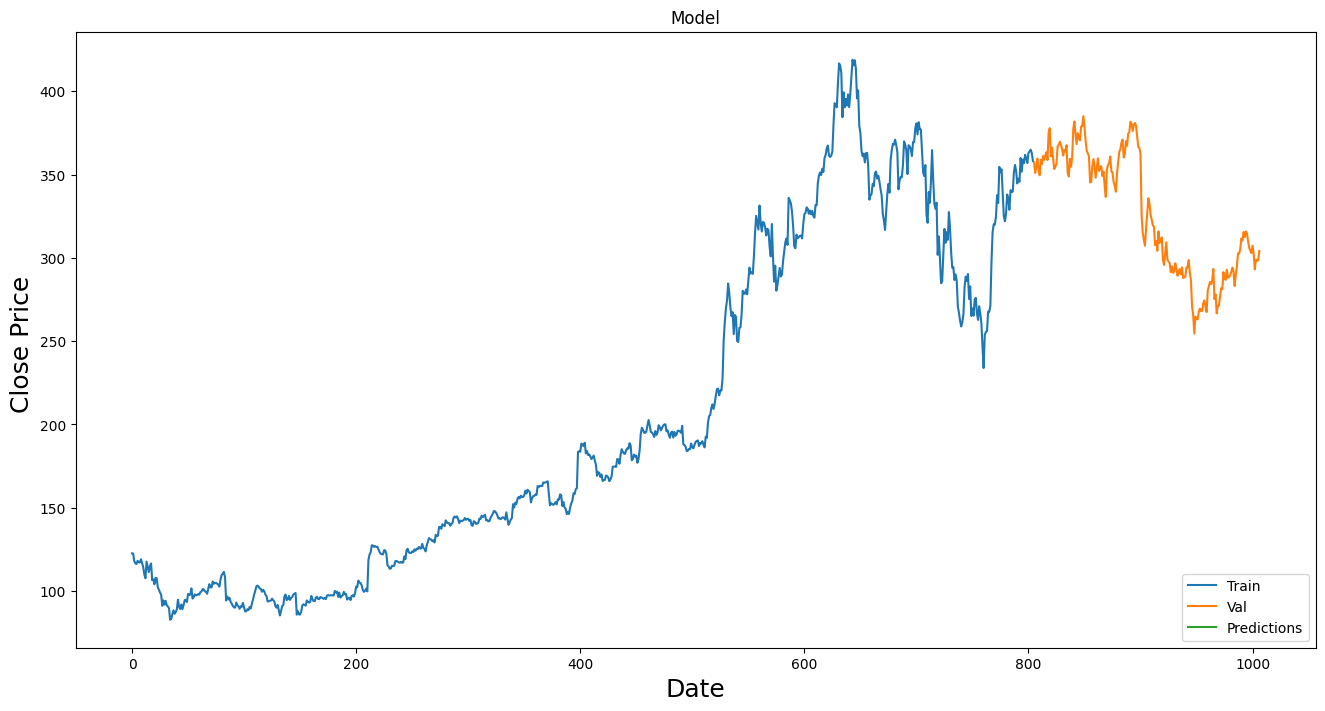

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = None
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()